In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf

import statsmodels.formula.api as smf
from scipy import stats

In [135]:
data = pd.read_csv("firstrun.csv")

mean_browse_time = data.groupby(['Prev.Length', 'Match.Score', 'Tile.Size', 'Prev.Type'])['Browse.Time'].mean().reset_index()
mean_browse_time

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,30,55,0.4,AC,21.735491
1,50,65,0.3,AC,19.384134
2,55,100,0.5,AC,19.690542
3,60,70,0.1,AC,16.898836
4,65,30,0.1,TT,19.714132
5,70,45,0.2,TT,17.745648
6,75,60,0.4,AC,17.730781
7,80,85,0.2,AC,17.149231
8,110,35,0.1,TT,17.785210
9,120,25,0.1,TT,19.300831


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prev.Length  1000 non-null   int64  
 1   Match.Score  1000 non-null   int64  
 2   Tile.Size    1000 non-null   float64
 3   Prev.Type    1000 non-null   object 
 4   Browse.Time  1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [137]:
fig = px.bar(mean_browse_time, x='Prev.Length', y='Browse.Time',
             title='Average Browsing Time vs Previous Length')
fig.show()

# Plot for Browse_Time vs Match.Score
fig2 = px.bar(mean_browse_time, x='Match.Score', y='Browse.Time', title='Browse Time vs Match Score')
fig2.show()

# Plot for Browse_Time vs Tile.Size
fig3 = px.bar(mean_browse_time, x='Tile.Size', y='Browse.Time', title='Browse Time vs Tile Size')
fig3.show()

# Plot for Browse_Time vs Prev.Type
# Note: Since 'Prev.Type' is a categorical variable, it might be better to use a box plot or a violin plot.
fig4 = px.box(mean_browse_time, x='Prev.Type', y='Browse.Time', title='Browse Time vs Prev Type')
fig4.show()

# 2^k Factorial Design

- In the report, data from different simulation have been used for this part.

In [138]:
two_k = pd.read_csv('2kdesign.csv')

two_k.rename(columns=lambda x: x.replace('.', '_'), inplace=True)

two_k['Prev_Length'] = two_k['Prev_Length'].astype(float)
two_k['Match_Score'] = two_k['Match_Score'].astype(float)
two_k['Tile_Size'] = two_k['Tile_Size'].astype(float)
two_k['Prev_Type'] = two_k['Prev_Type'].astype('category')

two_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Prev_Length  1600 non-null   float64 
 1   Match_Score  1600 non-null   float64 
 2   Tile_Size    1600 non-null   float64 
 3   Prev_Type    1600 non-null   category
 4   Browse_Time  1600 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 51.8 KB


In [139]:
model = smf.ols('Browse_Time ~ Prev_Length * Match_Score * Tile_Size * C(Prev_Type)', data=two_k).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_Time   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     831.0
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:30:45   Log-Likelihood:                -2257.1
No. Observations:                1600   AIC:                             4546.
Df Residuals:                    1584   BIC:                             4632.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               24.9645      0.175    142.956      0.000      24.622      25.307
C(Prev_Type)[T.TT]                                      -5.3329      0.247    -21.594      0.000      -5.817      -4.848
Prev_Length                                             -0.0015      0.002     -0.759      0.448      -0.005       0.002
Prev_Length:C(Prev_Type)[T.TT]                           0.0049      0.003      1.729      0.084      -0.001       0.010
Match_Score                                             -0.0394      0.002    -15.953      0.000      -0.044      -0.035
Match_Score:C(Prev_Type)[T.TT]                           0.0027      0.003      0.778      0.437      -0.004       0.010
Prev_Length:Match_Score                                  0.0003   2.82e-05     12.011      0.000       0.000       0.000
Prev_Length:Match_Score:C(Prev_Type)[T.TT]           -3.561e-05   3.99e-05     -0.892      0.373      -0.000    4.27e-05
Tile_Size                                                0.2333      0.484      0.482      0.630      -0.717       1.183
Tile_Size:C(Prev_Type)[T.TT]                             0.9612      0.685      1.403      0.161      -0.382       2.305
Prev_Length:Tile_Size                                   -0.0022      0.006     -0.400      0.689      -0.013       0.009
Prev_Length:Tile_Size:C(Prev_Type)[T.TT]                -0.0076      0.008     -0.975      0.330      -0.023       0.008
Match_Score:Tile_Size                                   -0.0046      0.007     -0.668      0.504      -0.018       0.009
Match_Score:Tile_Size:C(Prev_Type)[T.TT]                -0.0088      0.010     -0.904      0.366      -0.028       0.010
Prev_Length:Match_Score:Tile_Size                      5.25e-05   7.83e-05      0.670      0.503      -0.000       0.000
Prev_Length:Match_Score:Tile_Size:C(Prev_Type)[T.TT]  5.838e-05      0.000      0.527      0.598      -0.000       0.000
==============================================================================
Omnibus:                        8.497   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                6.476
Skew:                           0.035   Prob(JB):                       0.0392
Kurtosis:                       2.696   Cond. No.                     2.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# The Second Set of Experiments

In [140]:
new_data = pd.read_csv("secondrun.csv")
new_data.rename(columns=lambda x: x.replace('.', '_'), inplace=True)

new_data['Prev_Length'] = new_data['Prev_Length'].astype(float)
new_data['Match_Score'] = new_data['Match_Score'].astype(float)
new_data['Tile_Size'] = new_data['Tile_Size'].astype(float)
new_data['Prev_Type'] = new_data['Prev_Type'].astype('category')

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Match_Score  3000 non-null   float64 
 1   Prev_Length  3000 non-null   float64 
 2   Prev_Type    3000 non-null   category
 3   Tile_Size    3000 non-null   float64 
 4   Browse_Time  3000 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 96.9 KB


In [141]:
mean_browse_time = new_data.groupby(['Prev_Length', 'Match_Score', 'Tile_Size', 'Prev_Type'])['Browse_Time'].mean().reset_index()
mean_browse_time

,Prev_Length,Match_Score,Tile_Size,Prev_Type,Browse_Time
0,45.0,50.0,0.2,AC,22.119528
1,45.0,50.0,0.2,TT,17.091101
2,45.0,70.0,0.2,AC,18.062620
3,45.0,70.0,0.2,TT,13.243832
4,45.0,90.0,0.2,AC,18.528308
5,45.0,90.0,0.2,TT,13.541089
6,60.0,50.0,0.2,AC,22.346298
7,60.0,50.0,0.2,TT,17.239253
8,60.0,70.0,0.2,AC,17.125488
9,60.0,70.0,0.2,TT,11.849249


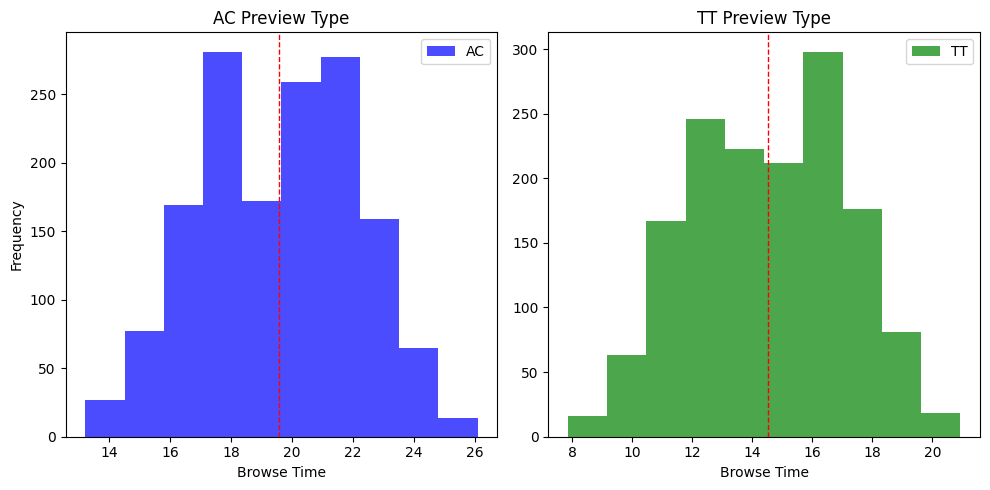

In [142]:
# Filter data by Preview Type
ac_data = new_data[new_data['Prev_Type'] == 'AC']['Browse_Time']
tt_data = new_data[new_data['Prev_Type'] == 'TT']['Browse_Time']

# Plot histograms
plt.figure(figsize=(10, 5))

# Histogram for AC
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(ac_data, color='blue', alpha=0.7, label='AC')
plt.axvline(ac_data.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('AC Preview Type')
plt.xlabel('Browse Time')
plt.ylabel('Frequency')
plt.legend()

# Histogram for TT
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(tt_data, color='green', alpha=0.7, label='TT')
plt.axvline(tt_data.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('TT Preview Type')
plt.xlabel('Browse Time')
plt.legend()

plt.tight_layout()
plt.show()

In [143]:
filtered_df = new_data[(new_data['Prev_Type'] == 'TT')]

model = smf.ols('Browse_Time ~ Prev_Length * Match_Score * Tile_Size', data=two_k).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_Time   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     55.06
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           1.03e-70
Time:                        19:30:46   Log-Likelihood:                -3829.7
No. Observations:                1600   AIC:                             7675.
Df Residuals:                    1592   BIC:                             7718.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            22.2980      0.329     67.747      0.000      21.652      22.944
Prev_Length                           0.0009      0.004      0.246      0.806      -0.006       0.008
Match_Score                          -0.0380      0.005     -8.172      0.000      -0.047      -0.029
Prev_Length:Match_Score               0.0003   5.32e-05      6.038      0.000       0.000       0.000
Tile_Size                             0.7139      0.913      0.782      0.434      -1.077       2.504
Prev_Length:Tile_Size                -0.0060      0.010     -0.578      0.563      -0.027       0.014
Match_Score:Tile_Size                -0.0090      0.013     -0.694      0.488      -0.034       0.016
Prev_Length:Match_Score:Tile_Size  8.168e-05      0.000      0.553      0.580      -0.000       0.000
==============================================================================
Omnibus:                    10869.178   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.182
Skew:                          -0.008   Prob(JB):                     4.03e-33
Kurtosis:                       1.504   Cond. No.                     9.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

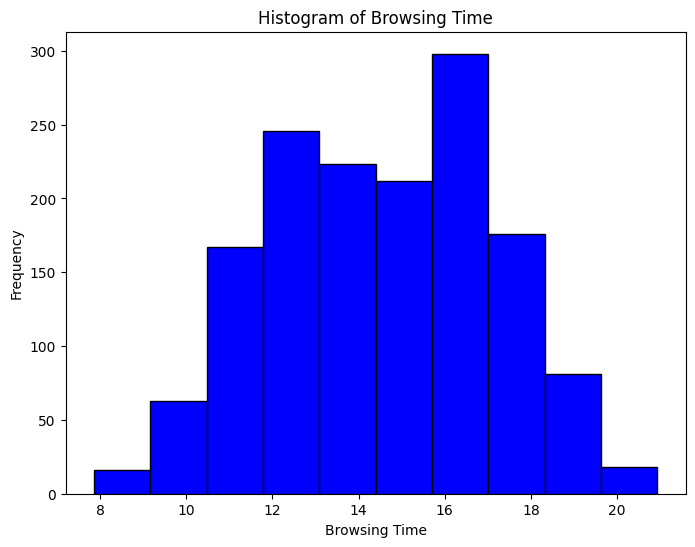

In [144]:
# Filter the data based on your conditions
filtered_df = new_data[(new_data['Prev_Type'] == 'TT')]

plt.figure(figsize=(8, 6))
plt.hist(filtered_df['Browse_Time'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Browsing Time')
plt.ylabel('Frequency')
plt.title('Histogram of Browsing Time')
plt.show()

In [145]:
mean_browse_time = new_data.groupby(['Prev_Length', 'Match_Score', 'Tile_Size', 'Prev_Type'])['Browse_Time'].mean().reset_index()
mean_browse_time

,Prev_Length,Match_Score,Tile_Size,Prev_Type,Browse_Time
0,45.0,50.0,0.2,AC,22.119528
1,45.0,50.0,0.2,TT,17.091101
2,45.0,70.0,0.2,AC,18.062620
3,45.0,70.0,0.2,TT,13.243832
4,45.0,90.0,0.2,AC,18.528308
5,45.0,90.0,0.2,TT,13.541089
6,60.0,50.0,0.2,AC,22.346298
7,60.0,50.0,0.2,TT,17.239253
8,60.0,70.0,0.2,AC,17.125488
9,60.0,70.0,0.2,TT,11.849249


In [146]:
min(np.array(mean_browse_time['Browse_Time']))

10.212924724616537

In [147]:
fourth_run = pd.read_csv('fourthrun.csv')
fourth_run.rename(columns=lambda x: x.replace('.', '_'), inplace=True)
fourth_run['Prev_Length'] = fourth_run['Prev_Length'].astype(float)
fourth_run['Match_Score'] = fourth_run['Match_Score'].astype(float)
fourth_run['Tile_Size'] = fourth_run['Tile_Size'].astype(float)
fourth_run['Prev_Type'] = fourth_run['Prev_Type'].astype('category')

fourth_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Prev_Length  3300 non-null   float64 
 1   Match_Score  3300 non-null   float64 
 2   Tile_Size    3300 non-null   float64 
 3   Prev_Type    3300 non-null   category
 4   Browse_Time  3300 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 106.6 KB


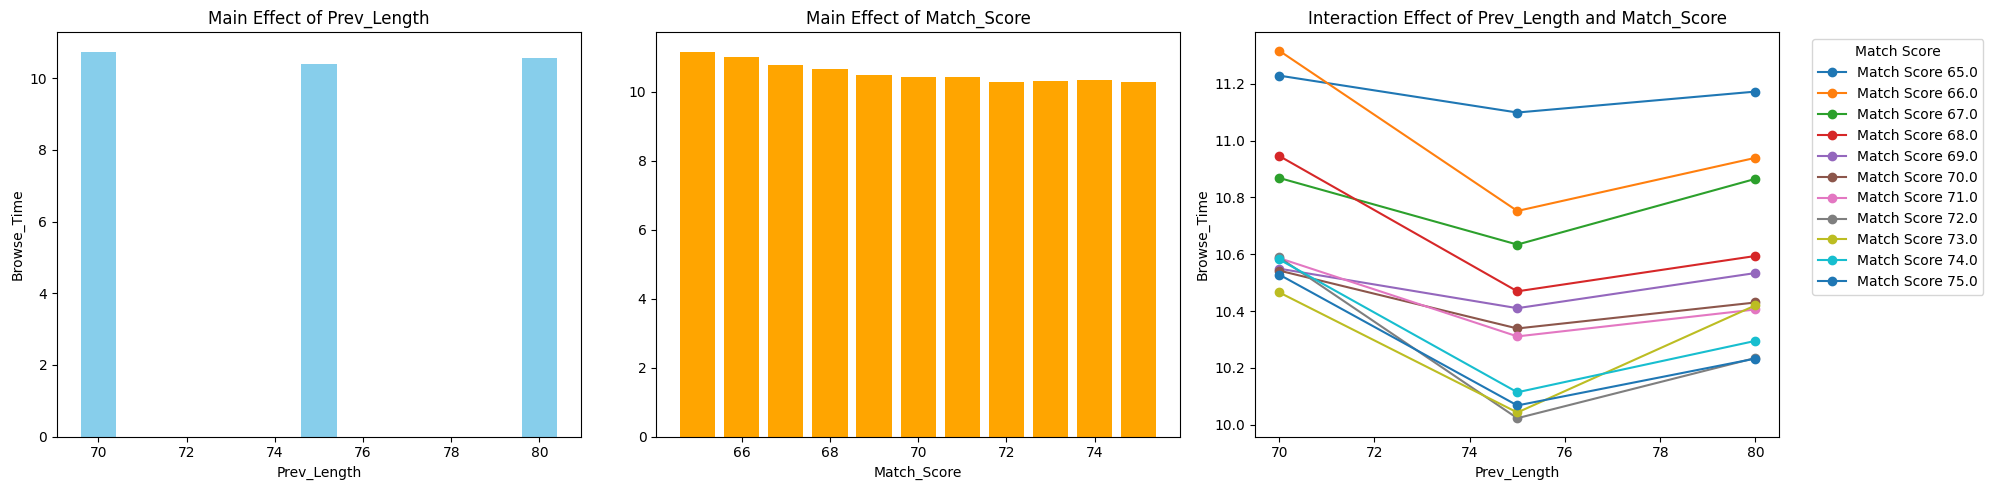

In [148]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Bar plot for Main Effect of Prev_Length
prev_length_means = fourth_run.groupby('Prev_Length')['Browse_Time'].mean()
axs[0].bar(prev_length_means.index, prev_length_means.values, color='skyblue')
axs[0].set_title('Main Effect of Prev_Length')
axs[0].set_xlabel('Prev_Length')
axs[0].set_ylabel('Browse_Time')

# Bar plot for Main Effect of Match_Score
match_score_means = fourth_run.groupby('Match_Score')['Browse_Time'].mean()
axs[1].bar(match_score_means.index, match_score_means.values, color='orange')
axs[1].set_title('Main Effect of Match_Score')
axs[1].set_xlabel('Match_Score')

# Line plot for Interaction Effect of Prev_Length and Match_Score
# Calculate the means for each combination of Prev_Length and Match_Score for the interaction effect
interaction_means = fourth_run.groupby(['Prev_Length', 'Match_Score'])['Browse_Time'].mean().unstack()

# Plot a line for each Match_Score
for match_score in interaction_means.columns:
    axs[2].plot(interaction_means.index, interaction_means[match_score], marker='o', label=f'Match Score {match_score}')

axs[2].set_title('Interaction Effect of Prev_Length and Match_Score')
axs[2].set_xlabel('Prev_Length')
axs[2].set_ylabel('Browse_Time')
axs[2].legend(title='Match Score', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [149]:
last_run = pd.read_csv('lastrun.csv')
last_run.rename(columns=lambda x: x.replace('.', '_'), inplace=True)
last_run['Prev_Length'] = last_run['Prev_Length'].astype(float)
last_run['Match_Score'] = last_run['Match_Score'].astype(float)
last_run['Tile_Size'] = last_run['Tile_Size'].astype(float)
last_run['Prev_Type'] = last_run['Prev_Type'].astype('category')

last_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Prev_Length  1500 non-null   float64 
 1   Match_Score  1500 non-null   float64 
 2   Tile_Size    1500 non-null   float64 
 3   Prev_Type    1500 non-null   category
 4   Browse_Time  1500 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 48.6 KB


# Minimum Browsing Time with 95% C.I.

In [150]:
# Filter the data based on your conditions
filtered_df = last_run[(last_run['Prev_Type'] == 'TT') & 
                 (last_run['Prev_Length'] == 75) & 
                 (last_run['Match_Score'] == 77)]

# Calculate the mean and standard error of the mean
mean = filtered_df['Browse_Time'].mean()
sem = stats.sem(filtered_df['Browse_Time'])

# Calculate the 95% confidence interval
confidence_interval = stats.t.interval(0.95, len(filtered_df)-1, loc=mean, scale=sem)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (9.781757337622897, 10.136518125286782)


# Student's T-test Match Score 77 vs 78

In [151]:
browsing_times_ms_77 = last_run[(last_run['Match_Score'] == 77) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']
browsing_times_ms_78 = last_run[(last_run['Match_Score'] == 78) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']

# Perform Levene's test to compare the variances of the two samples
f_stat_real, p_value_var_real = stats.levene(browsing_times_ms_77, browsing_times_ms_78)

# Perform a t-test to compare the mean browsing times
t_stat_real, p_value_real = stats.ttest_ind(browsing_times_ms_77, browsing_times_ms_78, equal_var=False)

print('F-test', f_stat_real, p_value_var_real)
print('T-test', t_stat_real, p_value_real)

F-test 0.04301616707597462 0.8359079890453489
T-test -2.147238771964465 0.03299576820470852


# Student's T-test Match Score 77 vs 76

In [152]:
browsing_times_ms_77 = last_run[(last_run['Match_Score'] == 77) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']
browsing_times_ms_76 = last_run[(last_run['Match_Score'] == 76) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']

# Perform Levene's test to compare the variances of the two samples
f_stat_real, p_value_var_real = stats.levene(browsing_times_ms_77, browsing_times_ms_76)

# Perform a t-test to compare the mean browsing times
t_stat_real, p_value_real = stats.ttest_ind(browsing_times_ms_77, browsing_times_ms_76, equal_var=False)


print('F-test', f_stat_real, p_value_var_real)
print('T-test', t_stat_real, p_value_real)

F-test 1.6175511705471668 0.2049253720042281
T-test -1.5473944582299002 0.12337300013876588


# Student's T-test Match Score 77 vs 75

In [153]:
browsing_times_ms_77 = last_run[(last_run['Match_Score'] == 77) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']
browsing_times_ms_75 = fourth_run[(fourth_run['Match_Score'] == 75) & (fourth_run['Prev_Type'] == 'TT') & (fourth_run['Tile_Size'] == 0.2) & (fourth_run['Prev_Length'] == 75)]['Browse_Time']

# Perform Levene's test to compare the variances of the two samples
f_stat_real, p_value_var_real = stats.levene(browsing_times_ms_77, browsing_times_ms_75)

# Perform a t-test to compare the mean browsing times
t_stat_real, p_value_real = stats.ttest_ind(browsing_times_ms_77, browsing_times_ms_75, equal_var=False)

print('F-test', f_stat_real, p_value_var_real)
print('T-test', t_stat_real, p_value_real)

F-test 2.899707224362187 0.09016484624796811
T-test -0.781126433405977 0.43569107831696674


# Student's T-test Match Score 77 vs 74

In [154]:
browsing_times_ms_77 = last_run[(last_run['Match_Score'] == 77) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']
browsing_times_ms_74 = fourth_run[(fourth_run['Match_Score'] == 74) & (fourth_run['Prev_Type'] == 'TT') & (fourth_run['Tile_Size'] == 0.2) & (fourth_run['Prev_Length'] == 75)]['Browse_Time']

# Perform Levene's test to compare the variances of the two samples
f_stat_real, p_value_var_real = stats.levene(browsing_times_ms_77, browsing_times_ms_74)


# Perform a t-test to compare the mean browsing times
t_stat_real, p_value_real = stats.ttest_ind(browsing_times_ms_77, browsing_times_ms_74, equal_var=False)

print('F-test', f_stat_real, p_value_var_real)
print('T-test', t_stat_real, p_value_real)

F-test 0.2845280731277533 0.5943468529175773
T-test -1.1642784147061755 0.2457268255218536


# Student's T-test Match Score 77 vs 73

In [155]:
browsing_times_ms_77 = last_run[(last_run['Match_Score'] == 77) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']
browsing_times_ms_73 = fourth_run[(fourth_run['Match_Score'] == 73) & (fourth_run['Prev_Type'] == 'TT') & (fourth_run['Tile_Size'] == 0.2) & (fourth_run['Prev_Length'] == 75)]['Browse_Time']

# Perform Levene's test to compare the variances of the two samples
f_stat_real, p_value_var_real = stats.levene(browsing_times_ms_77, browsing_times_ms_73)


# Perform a t-test to compare the mean browsing times
t_stat_real, p_value_real = stats.ttest_ind(browsing_times_ms_77, browsing_times_ms_73, equal_var=False)

print('F-test', f_stat_real, p_value_var_real)
print('T-test', t_stat_real, p_value_real)

F-test 0.049222095062119255 0.8246511156086511
T-test -0.6331224607799871 0.5273911514075798


# Student's T-test Match Score 77 vs 72

In [156]:
browsing_times_ms_77 = last_run[(last_run['Match_Score'] == 77) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']
browsing_times_ms_72 = fourth_run[(fourth_run['Match_Score'] == 72) & (fourth_run['Prev_Type'] == 'TT') & (fourth_run['Tile_Size'] == 0.2) & (fourth_run['Prev_Length'] == 75)]['Browse_Time']

# Perform Levene's test to compare the variances of the two samples
f_stat_real, p_value_var_real = stats.levene(browsing_times_ms_77, browsing_times_ms_72)


# Perform a t-test to compare the mean browsing times
t_stat_real, p_value_real = stats.ttest_ind(browsing_times_ms_77, browsing_times_ms_72, equal_var=False)
print('F-test', f_stat_real, p_value_var_real)
print('T-test', t_stat_real, p_value_real)

F-test 0.00047600853202241943 0.9826154099785219
T-test -0.4964837505085912 0.6201048783549192


# Student's T-test Match Score 77 vs 71

In [157]:
browsing_times_ms_77 = last_run[(last_run['Match_Score'] == 77) & (last_run['Prev_Type'] == 'TT') & (last_run['Tile_Size'] == 0.2) & (last_run['Prev_Length'] == 75)]['Browse_Time']
browsing_times_ms_71 = fourth_run[(fourth_run['Match_Score'] == 71) & (fourth_run['Prev_Type'] == 'TT') & (fourth_run['Tile_Size'] == 0.2) & (fourth_run['Prev_Length'] == 75)]['Browse_Time']

# Perform Levene's test to compare the variances of the two samples
f_stat_real, p_value_var_real = stats.levene(browsing_times_ms_77, browsing_times_ms_71)


# Perform a t-test to compare the mean browsing times
t_stat_real, p_value_real = stats.ttest_ind(browsing_times_ms_77, browsing_times_ms_71, equal_var=False)

print('F-test', f_stat_real, p_value_var_real)
print('T-test', t_stat_real, p_value_real)

F-test 0.5753210348281944 0.4490541088275839
T-test -2.776563489085714 0.006021060528665946
